In [8]:
import pickle

import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  print("Invalid device or cannot modify virtual devices once initialized.")
  pass

In [16]:
X_train, y_train = pickle.load(open( "dict.pickle", "rb" ))
scaler = pickle.load(open('scaler.pickle', 'rb'))

model = tf.keras.models.load_model("recurrent_model_initial.h5")

In [23]:
p = []
y_true = []
for i in range(10):
    p.append(scaler.inverse_transform(model.predict(X_train[i].reshape(1, X_train.shape[1], X_train.shape[2])))[0].tolist())
    y_true.append(scaler.inverse_transform([y_train[i]])[0].tolist())

In [25]:
p[0], y_true[0]

([243.7879638671875,
  242.92909240722656,
  243.17884826660156,
  0.486641526222229,
  607.195068359375,
  550.2356567382812,
  500.9252014160156,
  -26.901142120361328,
  -128.68392944335938,
  -240.26837158203125,
  401413.4375,
  407494.28125,
  31768.57421875],
 [242.98,
  242.34,
  242.72,
  0.48,
  612.5,
  541.1,
  494.8,
  -18.12,
  -129.9,
  -240.3,
  397800.0,
  401550.0,
  26400.0])

In [9]:
data = pd.read_excel('features.xlsx')
input_data = data.drop(['Date','Time','Cos Phi AN Avg','Cos Phi BN Avg','Cos Phi CN Avg','Cos Phi Total Avg'], axis = 1)
input_data.columns

Index(['Vrms ph-n AN Avg', 'Vrms ph-n BN Avg', 'Vrms ph-n CN Avg',
       'Vrms ph-n NG Avg', 'Current A Avg', 'Current B Avg', 'Current C Avg',
       'Current Phi AN Avg', 'Current Phi BN Avg', 'Current Phi CN Avg',
       'Active Power Total Avg', 'Apparent Power Total Avg',
       'Reactive Power Total Avg'],
      dtype='object')

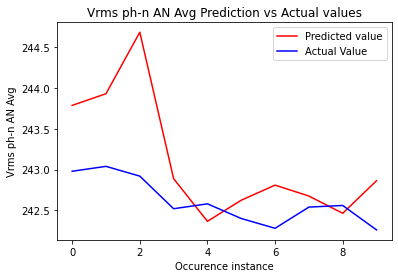

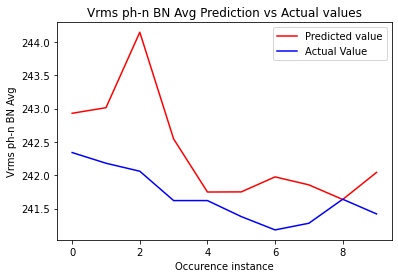

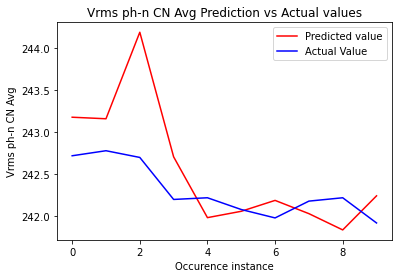

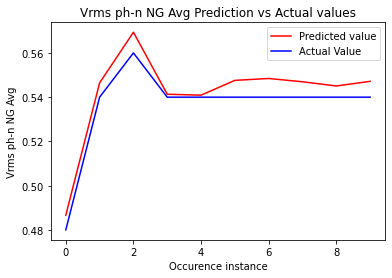

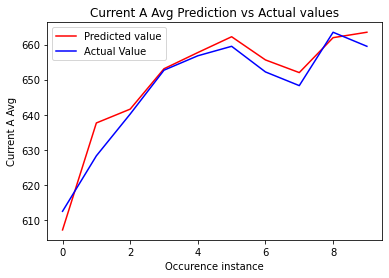

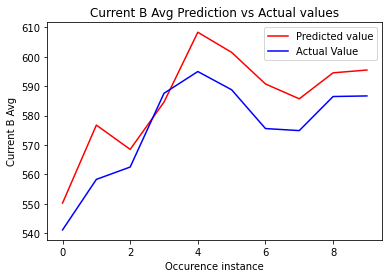

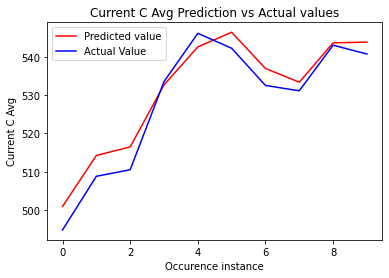

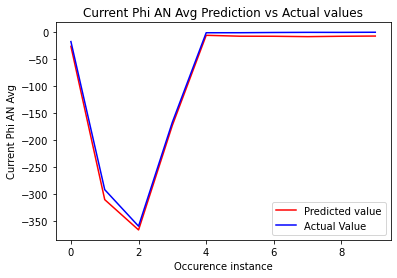

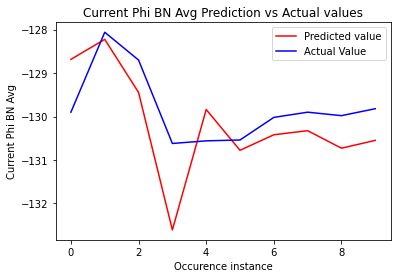

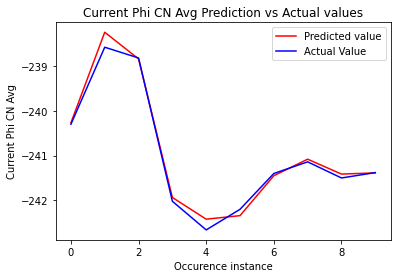

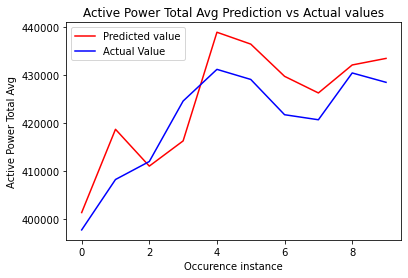

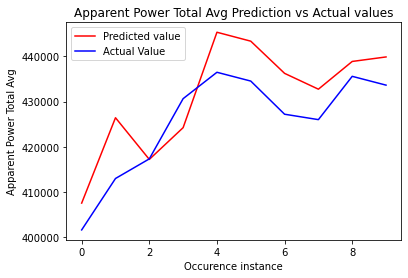

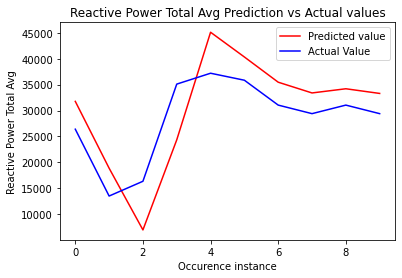

<Figure size 432x288 with 0 Axes>

In [28]:
for i in range(13):
    plt.plot([j[i] for j in p], 'r', label = 'Predicted value')
    plt.plot([k[i] for k in y_true], 'b', label = 'Actual Value')
    plt.title(input_data.columns[i] + ' Prediction vs Actual values')
    plt.legend()
    plt.xlabel('Occurence instance')
    plt.ylabel(input_data.columns[i])
    plt.show()
    plt.savefig(input_data.columns[i] + ' One step prediction.png')